In [1]:
import pandas as pd

In [4]:
df = pd.read_csv("http://51.91.120.89/extras/advertising.csv", usecols=["TV","sales"])
df

,TV,sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9
...,...,...
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5


In [5]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt

In [20]:
X = df[["TV"]]
y = df.sales

model = DecisionTreeRegressor(max_depth=6, random_state=0)
model.fit(X, y)

DecisionTreeRegressor(max_depth=6, random_state=0)

C:\Users\kurs\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


0.7805004963055056


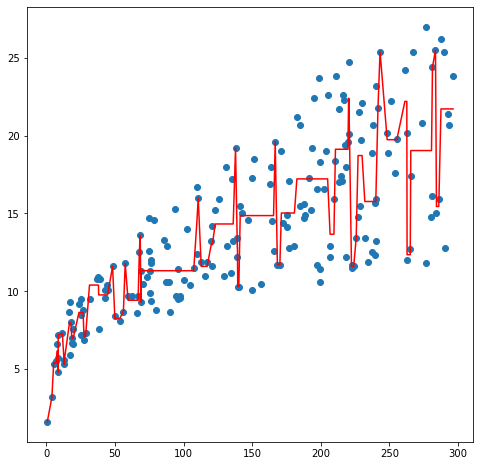

In [21]:
plt.figure(figsize=(8,8))
plt.scatter(X, y)

x = np.unique(X.values).reshape(-1,1)
y_pred = model.predict(x)
plt.plot(x, y_pred, c="r")

print(r2_score(y , model.predict(X) ))

### Analiza cen z otomoto.pl

In [22]:
df = pd.read_csv("http://51.91.120.89/extras/otomoto-dt.csv")
df

,Unnamed: 0,ID,Cena,Rocznik,Przebieg,Paliwo,Marka pojazdu,Model pojazdu,Wersja,Kategoria,...,Kolor,Perłowy,Zarejestrowany w Polsce,Bezwypadkowy,Serwisowany w ASO,Pierwszy właściciel,Metalik,Możliwość finansowania,Pojemnosc,Wyposażenie
0,0,6069409698,19500,2008,265340.0,Diesel,Volkswagen,Passat,B6 (2005-2010),Osobowe,...,Inny kolor,0,1,1,0,0,0,0,1896.0,ABS|ELEKTRYCZNE SZYBY PRZEDNIE|PODUSZKA POWIET...
1,1,6069322818,32000,2011,205000.0,Diesel,Volkswagen,Passat,B7 (2010-2014),Osobowe,...,Brązowy,0,1,1,0,0,1,0,1600.0,ABS|ELEKTRYCZNE SZYBY PRZEDNIE|PODUSZKA POWIET...
2,2,6069409878,11500,2008,373000.0,Diesel,Volkswagen,Passat,B6 (2005-2010),Osobowe,...,Niebieski,0,1,1,0,0,1,0,1968.0,ABS|ELEKTRYCZNE SZYBY PRZEDNIE|PODUSZKA POWIET...
3,3,6068447707,69800,2017,104000.0,Diesel,Volkswagen,Passat,B8 (2014-),Osobowe,...,Czarny,0,0,1,1,1,1,1,1998.0,ABS|ELEKTRYCZNE SZYBY PRZEDNIE|PODUSZKA POWIET...
4,4,6069140421,41900,2014,198000.0,Diesel,Volkswagen,Passat,B7 (2010-2014),Osobowe,...,Inny kolor,0,1,1,1,0,1,0,1968.0,ABS|ELEKTRYCZNE SZYBY PRZEDNIE|PODUSZKA POWIET...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2745,2962,6056325814,29900,2012,180000.0,Diesel,Volkswagen,Passat,B7 (2010-2014),Osobowe,...,Srebrny,0,0,1,1,0,0,0,1600.0,ABS|ELEKTRYCZNE SZYBY PRZEDNIE|PODUSZKA POWIET...
2746,2963,6064437586,35600,2011,230000.0,Diesel,Volkswagen,Passat,B7 (2010-2014),Osobowe,...,Beżowy,0,1,1,0,0,1,0,2000.0,ABS|ELEKTRYCZNE SZYBY PRZEDNIE|PODUSZKA POWIET...
2747,2964,6067342081,83900,2016,113000.0,Diesel,Volkswagen,Passat,B8 (2014-),Osobowe,...,Czarny,0,1,1,1,1,1,1,1968.0,ABS|ELEKTRYCZNE SZYBY PRZEDNIE|PODUSZKA POWIET...
2748,2965,6069411917,69999,2015,153000.0,Diesel,Volkswagen,Passat,B8 (2014-),Osobowe,...,Biały,0,0,1,1,0,0,0,2000.0,ABS|ELEKTRYCZNIE USTAWIANE LUSTERKA|PODUSZKA P...


In [52]:
df_B8 = df[ (df.Wersja.str.startswith('B8'))|(df.Wersja.str.startswith('B7')) ]
df_B8.shape

(2080, 23)

In [53]:
df_B8.columns

Index(['Unnamed: 0', 'ID', 'Cena', 'Rocznik', 'Przebieg', 'Paliwo',
       'Marka pojazdu', 'Model pojazdu', 'Wersja', 'Kategoria', 'Moc',
       'Skrzynia biegów', 'Typ', 'Kolor', 'Perłowy', 'Zarejestrowany w Polsce',
       'Bezwypadkowy', 'Serwisowany w ASO', 'Pierwszy właściciel', 'Metalik',
       'Możliwość finansowania', 'Pojemnosc', 'Wyposażenie'],
      dtype='object')

In [54]:
df_B8.drop(columns=['Unnamed: 0', 'ID','Marka pojazdu', 'Model pojazdu', 'Wersja', 'Kategoria',
                  'Typ','Możliwość finansowania','Wyposażenie'], inplace=True)

C:\Users\kurs\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [55]:
df_B8.Bezwypadkowy.value_counts()

1    2080
Name: Bezwypadkowy, dtype: int64

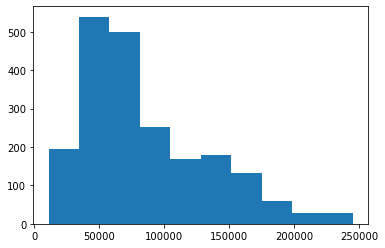

In [56]:
plt.hist( df_B8.Cena );

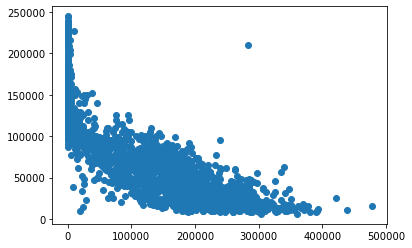

In [57]:
plt.scatter( df.Przebieg, df.Cena )

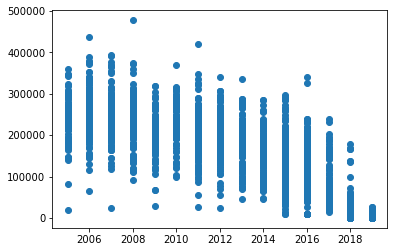

In [58]:
plt.scatter(df.Rocznik, df.Przebieg)

In [59]:
df_B8 = pd.get_dummies(df_B8)

In [60]:
df_B8

,Cena,Rocznik,Przebieg,Moc,Perłowy,Zarejestrowany w Polsce,Bezwypadkowy,Serwisowany w ASO,Pierwszy właściciel,Metalik,...,Kolor_Bordowy,Kolor_Brązowy,Kolor_Czarny,Kolor_Czerwony,Kolor_Inny kolor,Kolor_Niebieski,Kolor_Srebrny,Kolor_Szary,Kolor_Zielony,Kolor_Złoty
1,32000,2011,205000.0,105.0,0,1,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
3,69800,2017,104000.0,150.0,0,0,1,1,1,1,...,0,0,1,0,0,0,0,0,0,0
4,41900,2014,198000.0,140.0,0,1,1,1,0,1,...,0,0,0,0,1,0,0,0,0,0
5,31600,2012,229000.0,140.0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,115900,2019,1.0,150.0,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2745,29900,2012,180000.0,105.0,0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2746,35600,2011,230000.0,140.0,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2747,83900,2016,113000.0,190.0,0,1,1,1,1,1,...,0,0,1,0,0,0,0,0,0,0
2748,69999,2015,153000.0,150.0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
df_B8 = df_B8.sample(n=len(df_B8) , random_state=0 ) # dodatkowe mieszanie danych

In [62]:
X = df_B8.iloc[:, 1:]
y = df_B8.Cena

In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

for d in range(2,16):
    model = DecisionTreeRegressor(max_depth=d, random_state=0)
    model.fit(X_train, y_train)
    print(f"DT={d}", model.score(X_test, y_test))

DT=2 0.8321565721577338
DT=3 0.8758206940425999
DT=4 0.9092037893312539
DT=5 0.9304712485555976
DT=6 0.933277795451227
DT=7 0.9333485545757804
DT=8 0.9271375910818686
DT=9 0.9273586371095824
DT=10 0.9256002509120227
DT=11 0.9286141511269059
DT=12 0.9250596008813731
DT=13 0.9300692855433718
DT=14 0.925761516961732
DT=15 0.9196180301633575


In [64]:
model = DecisionTreeRegressor(max_depth=6, random_state=0)
model.fit(X_train, y_train)
print(f"DT={d}", model.score(X_test, y_test))

DT=15 0.933277795451227


In [65]:
pd.DataFrame( model.feature_importances_ , X.columns).sort_values(0, ascending=False)

,0
Przebieg,7.330708e-01
Rocznik,1.386819e-01
Moc,1.117329e-01
Paliwo_Benzyna,5.687560e-03
Skrzynia biegów_Manualna,5.151269e-03
Kolor_Niebieski,2.300982e-03
Kolor_Srebrny,1.337568e-03
Paliwo_Diesel,9.366856e-04
Pojemnosc,7.185478e-04
Skrzynia biegów_Automatyczna bezstopniowa (CVT),2.264383e-04
